# CNN Model

- input = image

- output = score (Mean Vol After Open / Mean Vol Before Open) 

### 0. Installation (torch & fastai)

In [1]:
import torch

In [2]:
torch.__version__

'1.7.1+cu101'

In [10]:
# pip install torch===1.7.0 torchvision===0.8.1 torchaudio===0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

In [1]:
#pip install fastai

In [2]:
#pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.5 MB 14.2 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip show fastai

Name: fastai
Version: 2.2.5
Summary: fastai simplifies training fast and accurate neural nets using modern best practices
Home-page: https://github.com/fastai/fastai/tree/master/
Author: Jeremy Howard, Sylvain Gugger, and contributors
Author-email: info@fast.ai
License: Apache Software License 2.0
Location: /opt/conda/lib/python3.7/site-packages
Requires: scipy, requests, pip, matplotlib, pyyaml, pillow, fastcore, scikit-learn, fastprogress, torch, packaging, torchvision, pandas, spacy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [4]:
from fastai.vision.all import *
from fastai.metrics import error_rate

In [5]:
torch.cuda.empty_cache()

In [6]:
print(torch.version.cuda)

10.1


In [7]:
torch.cuda.is_available()

True

In [8]:
torch.cuda.set_device(0)

### 1. Data Prep

In [9]:
data = (ImageDataLoaders.from_csv('../data/imgs/all', 'image_label_dir.csv', valid_pct=0.2, seed=10, item_tfms=Resize(224), bs = 5, num_workers = 0))
#         .random_split_by_pct(valid_pct=0.2, seed=10))
#         .split_by_idxs(list(range(400)), list(range(400,496))))
#                  .label_from_df()
#                  .databunch())

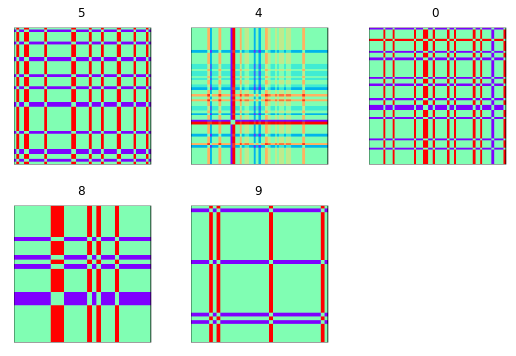

In [10]:
data.show_batch()

### 2. cnn model

In [32]:
learner = cnn_learner(data, models.resnet34, pretrained=True, metrics=[error_rate, accuracy]).to_fp16()
learner.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [33]:
learner.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,3.564965,2.726184,0.848485,0.151515,00:10


### Tuning Model

In [27]:
pip install pillow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ModuleAttributeError: 'Sequential' object has no attribute 'plot'

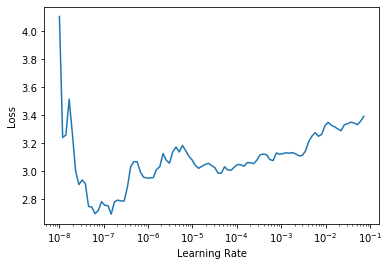

In [29]:
### Finding learning rate
learner.lr_find(start_lr=1e-08,end_lr=0.2, num_it=100) 
learner.recorder.plot(suggestion=True)

In [30]:
mingradlr = learner.recorder.min_grad_lr

ModuleAttributeError: 'Sequential' object has no attribute 'min_grad_lr'